In [1]:

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv('/content/drive/MyDrive/DATASET/Suicide_Ideation_Dataset(Twitter-based).csv')
data.head()

,Tweet,Suicide
0,making some lunch,Not Suicide post
1,@Alexia You want his money.,Not Suicide post
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post


In [3]:
data.dropna(inplace = True)
data.isnull().sum()

Tweet      0
Suicide    0
dtype: int64

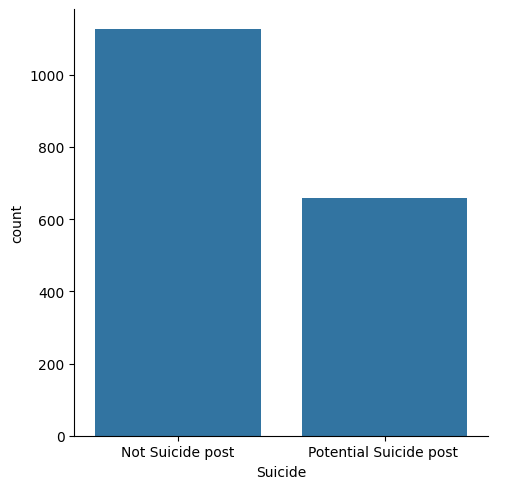

In [4]:
sns.catplot(data, x = 'Suicide', kind = 'count')

In [9]:
!pip install nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

def preprocessor(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = word_tokenize(text.lower())
    text = [PorterStemmer().stem(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
data['Tweet'] = data['Tweet'].apply(preprocessor)

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Suicide'] = encoder.fit_transform(data['Suicide'])
data.head()

,Tweet,Suicide
0,make lunch,0
1,alexia want money,0
2,dizzyhrvi crap took forev put togeth go go sle...,1
3,jnaylor kiwitweet hey jer sinc start twitter,0
4,tri quot delici librari quot mix result bar co...,0


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5220)
X = cv.fit_transform(data['Tweet']).toarray()
y = data.iloc[:, -1].values




In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
from xgboost import XGBClassifier
model = XGBClassifier()

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [15]:
y_pred = model.predict(X_test)
print(y_pred[:10])
print(y_test[:10])

[1 1 1 0 1 0 0 1 0 1]
[1 1 1 0 1 0 0 0 0 1]


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f'Train Accuracy Score : {accuracy_score(y_train, model.predict(X_train)):.2f}')
print(f'Test Accuracy Score : {accuracy_score(y_test, y_pred):.2f}')

Train Accuracy Score : 0.97
Test Accuracy Score : 0.96


<Axes: >

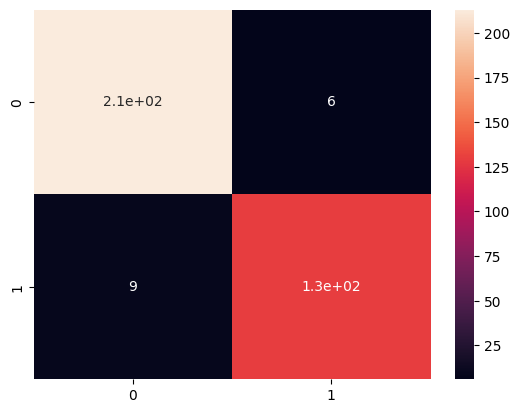

In [18]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       219
           1       0.96      0.93      0.95       138

    accuracy                           0.96       357
   macro avg       0.96      0.95      0.96       357
weighted avg       0.96      0.96      0.96       357

